In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt 

In [26]:
file_name = ('/home/jdiego/Downloads/data_pendulum.csv')

df_2 = pd.read_csv(file_name)

#gettig the data into pandas series: 
length  = np.array(df_2["Length(m)"])
period1 = df_2["Period1(s)"]
period2 = df_2["Period2(s)"]
period3 = df_2["Period3(s)"]
period4 = df_2["Period4(s)"]
period5 = df_2["Period5(s)"]

In [27]:
mean_p = []
stdv_p = []

for i in range(len(df_2["Period1(s)"])):
    #print(i)
    mean_p.append(np.mean(np.array(df_2.iloc[i][1:])))
    stdv_p.append(np.std(np.array(df_2.iloc[i][1:])))

mean_p = np.array(mean_p) # average values
stdv_p = np.array(stdv_p) # uncertainties


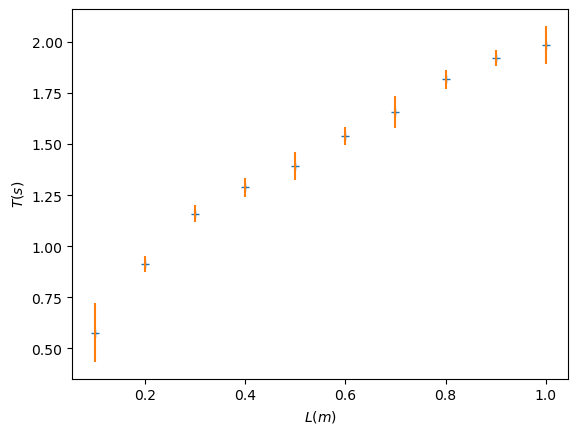

In [28]:
#Plotting: 

fig, ax = plt.subplots()
plt.plot(length, mean_p, linestyle = " ", marker = "+")
ax.errorbar(length, mean_p, yerr = 3*stdv_p, linestyle = " ")

plt.xlabel(r"$L (m)$")
plt.ylabel(r"$T (s)$")

plt.show()

### Let's use the X^2 function

In [29]:
def chi_sqr_function(beta):
    '''
    This function allows to return the chi_sqr_function.It allows to compare the experimetal 
    data with the model based
    INPUT:beta
    OUTPUT: chi_sqr_statistic
    '''
    model = beta*np.sqrt(length)
    
    chisqr = np.sum(mean_p - (model**2)/(stdv_p)**2)
    
    return chisqr

##### Let's do the optimazation 

In [30]:
#Defining the initial guess: 
x_0 = np.array((0))

# Call the minimazation routine: 
result_object = opt.minimize (chi_sqr_function,x_0)

print(result_object.x)

[0.28723145]


In [25]:
chisqr_statistic = chi_sqr_function(result_object.x)

print(chisqr_statistic)

-1538.5587150128986
